In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [2]:
def fhn_equations(U, W, K):
  dU_dt = K * U * (U - 0.4) * (1 - U) - W
  dW_dt = 0.5 * (0.2 * U - 0.8 * W)
  return dU_dt, dW_dt

In [3]:
def euler_solver(u0, w0, K, t_max, dt):
    """Solve FHN model using Euler method"""
    t = np.arange(0, t_max, dt)
    u = np.zeros_like(t)
    w = np.zeros_like(t)
    u[0], w[0] = u0, w0
    for i in range(1, len(t)):
        du_dt, dw_dt = fhn_equations(u[i - 1], w[i - 1], K)
        u[i] = u[i - 1] + du_dt * dt
        w[i] = w[i - 1] + dw_dt * dt
    return t, u, w

In [4]:
def generate_fhn_data(num_samples):
    """Generate data for different initial conditions and K values"""
    data = []
    t_max = 100
    dt = 0.01
    for i in range((num_samples)):
      u0 = np.random.uniform(.5,0.6)  # allowed to be vary 
      w0 = np.random.uniform(0,.1)   # allowed to be vary 
      K = np.random.uniform(2,2.5)  # allowed to be vary 
      t, u, w = euler_solver(u0, w0, K, t_max, dt)
      data.append({'t': t,'u0': u0, 'w0': w0, 'K': K, 'u': u, 'w': w})
    return data

In [5]:
# Generate Training Data
num_samples = 1000  # Specify how many samples you want
training_data = generate_fhn_data(num_samples=num_samples)

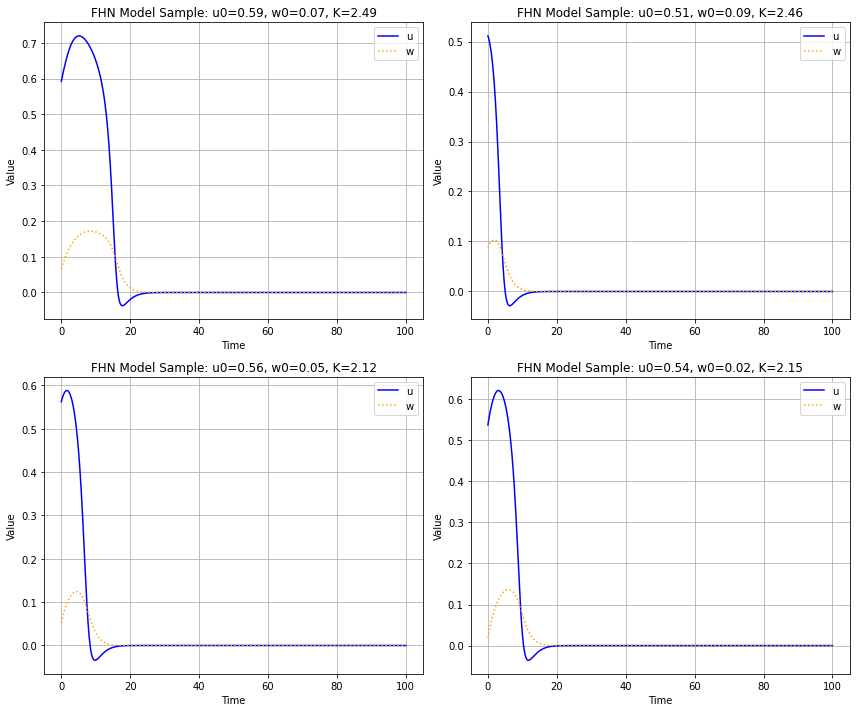

In [6]:
# Randomly select four samples to plot
num_samples = len(training_data)
random_indices = np.random.choice(num_samples, size=4, replace=False)

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through the randomly selected samples and plot their u and w values
for i, idx in enumerate(random_indices):
    axs[i].plot(training_data[idx]['t'], training_data[idx]['u'], label='u', color='blue')
    axs[i].plot(training_data[idx]['t'], training_data[idx]['w'], label='w', color='orange', linestyle='dotted')
    
    # Set labels and title for each subplot
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')
    axs[i].set_title(f"FHN Model Sample: u0={training_data[idx]['u0']:.2f}, w0={training_data[idx]['w0']:.2f}, K={training_data[idx]['K']:.2f}")
    axs[i].legend()
    axs[i].grid()

plt.tight_layout()
plt.show()